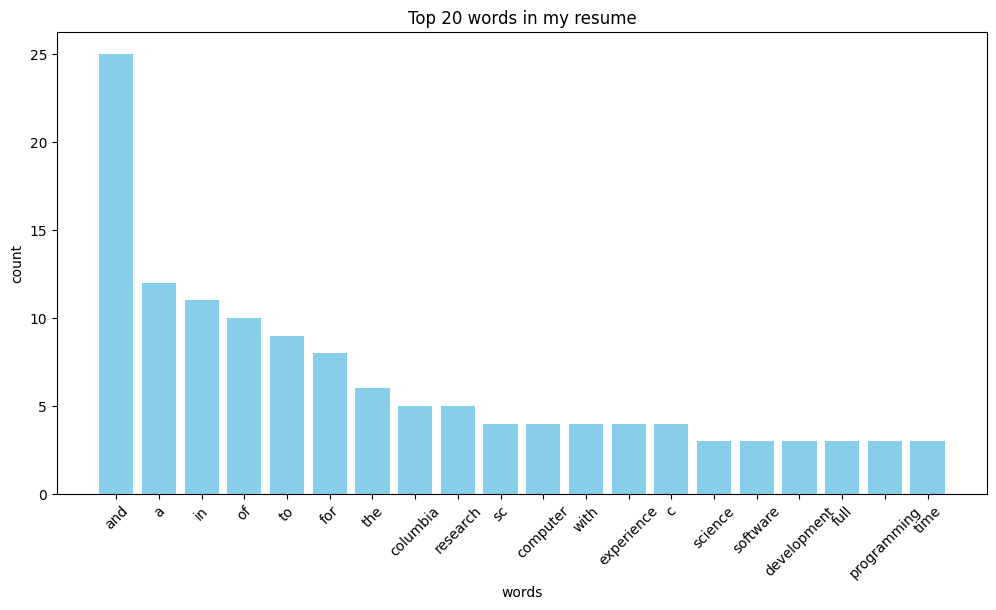

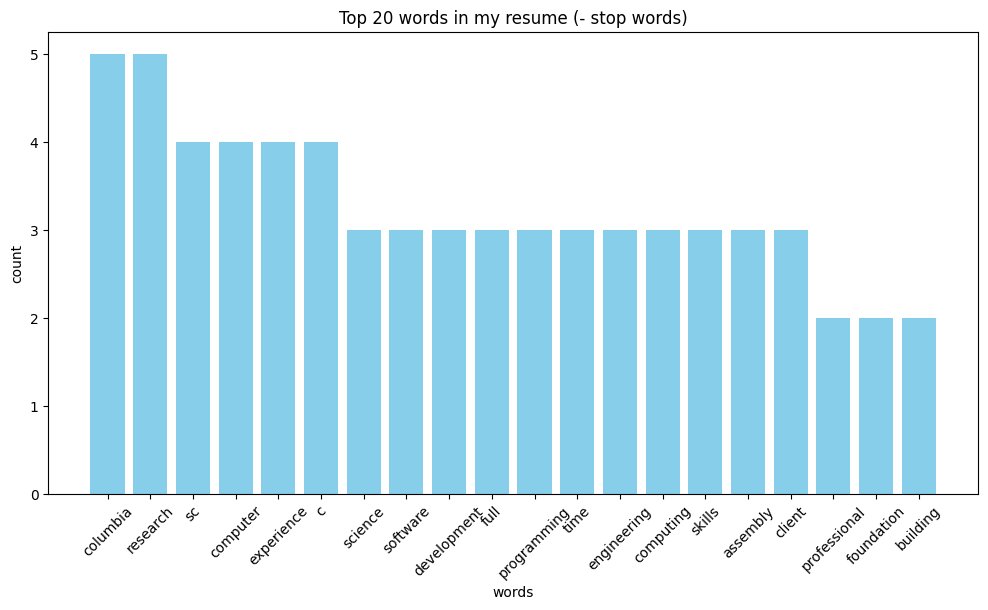

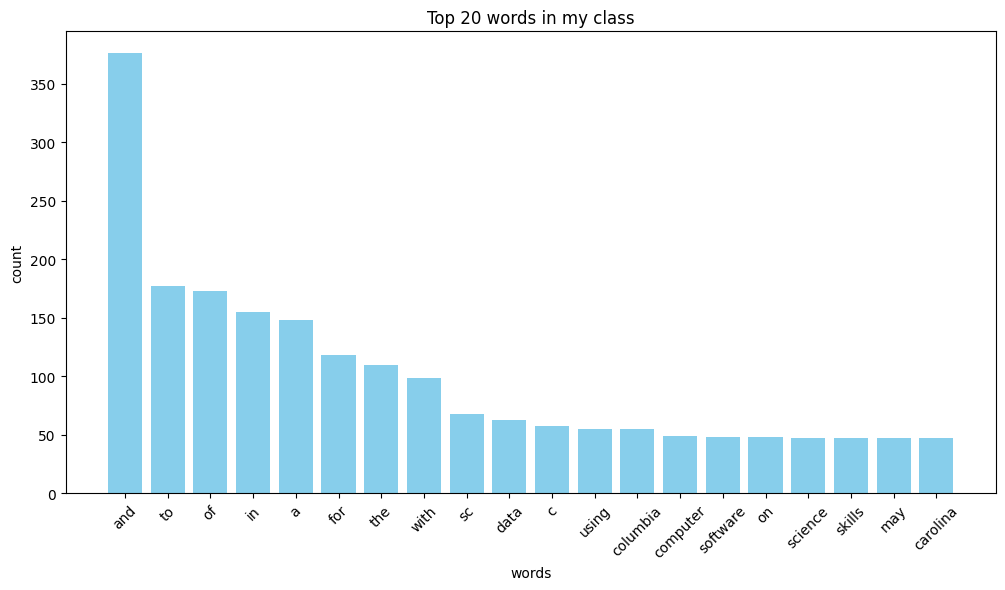

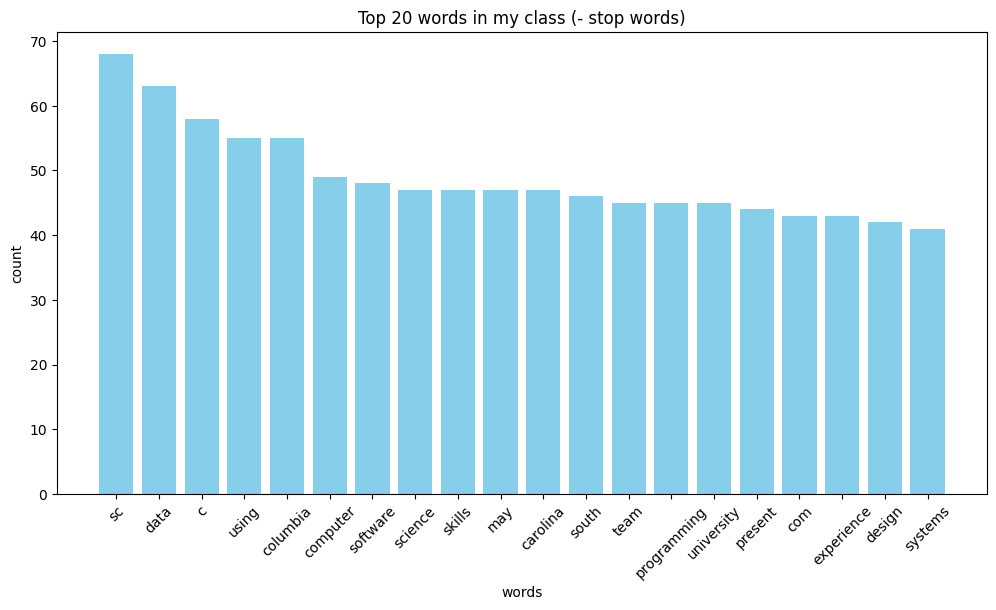

In [5]:
import fitz
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
# Saves filepath of resume PDF

def plot_top_words(words_list, title="Top 20 Words", xlable = "words", ylable="count"):

    # Count word frequencies
    word_counts = {}
    for word in words_list:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    # Sort and get top 20
    top20 = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:20]

    # Separate words and counts
    words = [w for w, _ in top20]
    counts = [c for _, c in top20]

    # Plot
    plt.figure(figsize=(12,6))
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.xticks(rotation=45)
    plt.show()

# Removes stop words from a list of words
def remove_stop_words(word_list, stop_words):
    filtered_words = [w for w in word_list if w.lower() not in stop_words]   
    return filtered_words

# Opens PDF file and saves words to an array
doc = fitz.open(os.path.join(os.getcwd(), r"Resumes\James Tabakian Resume 2025 (1) (1).pdf"))
text = ""
for page in doc:
   text+=page.get_text()

resume_words = re.findall(r'\b[a-zA-Z]+\b', text.lower())

# Adds stop words from raw file to list of stop words
with open(os.path.join(os.getcwd(), r"NLTK's list of english stopwords"), "r", encoding="utf-8") as f:
    stop_words = f.read().splitlines()
specific_words = remove_stop_words(resume_words,stop_words)


# TASK 1A
plot_top_words(resume_words,"Top 20 words in my resume")

# TASK 1B
plot_top_words(specific_words,"Top 20 words in my resume (- stop words)")

# Task 1C 
#   Analyze: Note which words emerge now. Was removing stop_words helpful in revealing more about you (from the resume).
#	Removing stop words was helpful because the new list of 20 words shows off more of my skills and background instead of including common words that are used in the majority of sentences.


# TASK 2A
# Adds words from everybodys resume onto a list
all_resume_words = []
for file in os.listdir(os.path.join(os.getcwd(), r"Resumes")):
    
    file_path = os.path.join(os.path.join(os.getcwd(), r"Resumes"), file)
    doc = fitz.open(file_path)
    text = ""
    for page in doc:
        text += page.get_text()
    doc.close()

    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    all_resume_words.extend(words)

# TASK 2B
plot_top_words(all_resume_words, "Top 20 words in my class")
all_spesific_words = remove_stop_words(all_resume_words,stop_words)

# TASK 2C
plot_top_words(all_spesific_words, "Top 20 words in my class (- stop words)")

# TASK 2D 
#   Analyze: Note which words emerge now. Was removing stop_words helpful in revealing more about the class (from the resumes).
#   Removing stop words was helpful because now it is easy to see on the list what skills and background the students come from in my class instead of half of the words being everyday common words.

# TASK 3A
#   Analyze: specific_words from your resume and that of class. Which words are unique to you?
#   I own a computer-building business so words like “client”, “building”, and “assembly” are common on my resume while they do not appear in the top 20 words for the class

